## Load libraries

In [13]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

In [2]:
def plot_history(H, epochs):
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
def plot_report(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

## Load cifar10 data

In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
X_train.shape # 50.000 images of 32x32x3 (colors)

(50000, 32, 32, 3)

In [25]:
# normalizing the data

def minmax(data):
    X_norm = (data - data.min()) / (data.max() - data.min())
    return X_norm

X_train = minmax(X_train)
X_test = minmax(X_test)

In [26]:
#create one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [27]:
# initialize label names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## ShallowNet 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

In [28]:
# initialising model
model = Sequential()

# define conv layer and relu layer. always defined together. CONV => ReLU
model.add(Conv2D(32,                       # we're using conv2d because we're only using height and width.
                 (3,3),                    # kernel size
                 padding = 'same',         # using 0-padding. 
                 input_shape = (32, 32, 3)))# input shape of each image

model.add(Activation('relu'))              #adding activation layer

# FC classifier
model.add(Flatten())
model.add(Dense(10)) # number of predictons available
model.add(Activation('softmax'))  # the softmax activation provides the distribution of the likelihood that an image is a 1 fx, or a plane fx.

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                327690    
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


__Compile model__

In [30]:
# define the gradient descent
sgd = SGD(0.01)
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                327690    
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


__Plot model__

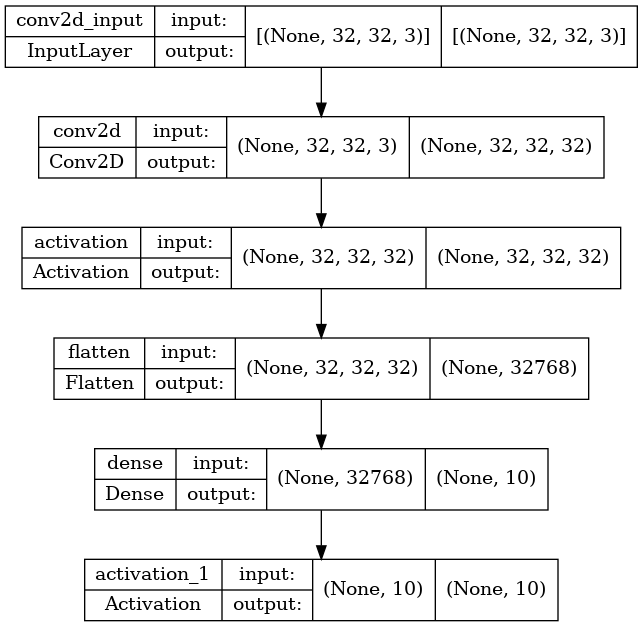

In [20]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [32]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10,
                    batch_size = 32)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8161 - accuracy: 0.3630 - val_loss: 1.6423 - val_accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5557 - accuracy: 0.4587 - val_loss: 1.4770 - val_accuracy: 0.4809
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4158 - accuracy: 0.5068 - val_loss: 1.3943 - val_accuracy: 0.5084
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3265 - accuracy: 0.5371 - val_loss: 1.3508 - val_accuracy: 0.5200
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2657 - accuracy: 0.5589 - val_loss: 1.3001 - val_accuracy: 0.5333
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2249 - accuracy: 0.5731 - val_loss: 1.2937 - val_accuracy: 0.5365
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1918 - accuracy: 0.5849 - val_loss: 1.3939 - val_accuracy:

__Evaluate model__

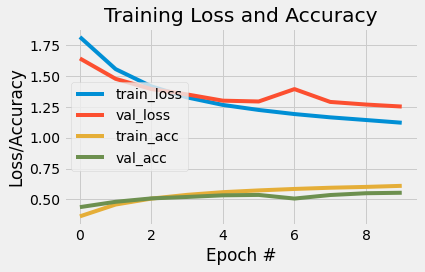

In [33]:
plot_history(history, 10)

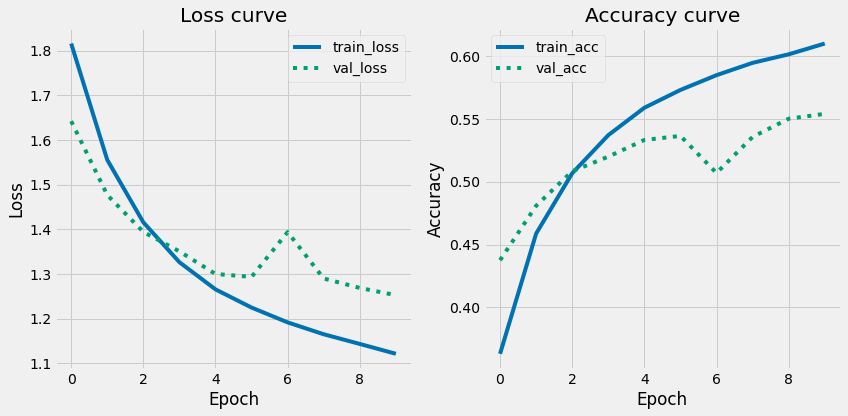

In [34]:
plot_report(history, 10)

In [35]:
# evaluate network
predictions = model.predict(X_test, batch_size=32)
# print classification report
print(predictions[0])

[3.54716694e-03 2.00939976e-04 1.04761183e-01 3.85380805e-01
 5.14961267e-03 3.48856091e-01 1.06532805e-01 1.38842373e-03
 4.39516343e-02 2.31393686e-04]


In [37]:
#predictions = model.predict(X_test, batch_size=32)
# print classification report
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.66      0.55      0.60      1000
  automobile       0.65      0.75      0.70      1000
        bird       0.43      0.47      0.45      1000
         cat       0.43      0.21      0.29      1000
        deer       0.50      0.40      0.44      1000
         dog       0.41      0.62      0.49      1000
        frog       0.49      0.77      0.60      1000
       horse       0.74      0.54      0.62      1000
        ship       0.67      0.72      0.69      1000
       truck       0.70      0.52      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.55     10000
weighted avg       0.57      0.55      0.55     10000



plot_model(H)

## LeNet

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [40]:
model = Sequential()

# first set of layers CONV => ReLU => MAXPOOL
model.add(Conv2D(32,                # we want 32 kernels/filters
                 (3,3),             # with size 3x3
                 padding = 'same',
                 input_shape = (32,32,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), # is the size of the pool we want. we want it on 2x2 pixels. like a small region of interest
                       strides = (2,2))) # how far we are stepping to vertically and horizontally

# second set of layers CONV => ReLU => MAXPOOL
model.add(Conv2D(50, (5,5),   # these values are a feature of the linet network. they can be changed
                 padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# FC => ReLU
model.add(Flatten())
model.add(Dense(512)) # nodes
model.add(Activation('relu'))

# softmax classifier 
model.add(Dense(10))
model.add(Activation('softmax'))
          
        

__Compile model__

In [41]:
# define the gradient descent
sgd = SGD(0.01)
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 50)        40050     
                                                                 
 activation_6 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                  

__Plot model__

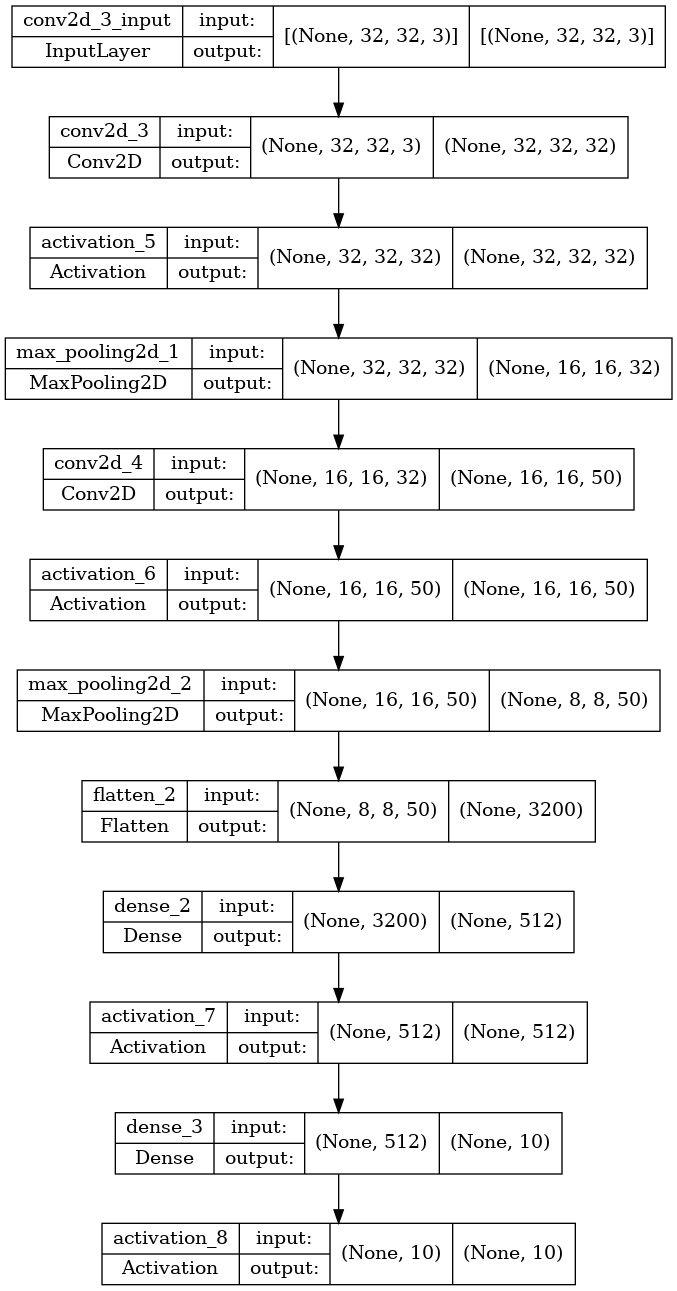

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [45]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10,
                    batch_size = 32)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8692 - accuracy: 0.3287 - val_loss: 1.8582 - val_accuracy: 0.3412
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4902 - accuracy: 0.4660 - val_loss: 1.3763 - val_accuracy: 0.5112
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3261 - accuracy: 0.5317 - val_loss: 1.2565 - val_accuracy: 0.5579
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2125 - accuracy: 0.5760 - val_loss: 1.1780 - val_accuracy: 0.5855
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1131 - accuracy: 0.6105 - val_loss: 1.1008 - val_accuracy: 0.6147
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0292 - accuracy: 0.6413 - val_loss: 1.0878 - val_accuracy: 0.6128
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9560 - accuracy: 0.6691 - val_loss: 1.0483 -

In [46]:
predictions = model.predict(X_test, batch_size=32)
# print classification report
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.61      0.83      0.70      1000
  automobile       0.83      0.72      0.77      1000
        bird       0.56      0.57      0.57      1000
         cat       0.48      0.56      0.51      1000
        deer       0.60      0.67      0.63      1000
         dog       0.57      0.57      0.57      1000
        frog       0.80      0.71      0.75      1000
       horse       0.75      0.74      0.74      1000
        ship       0.87      0.69      0.77      1000
       truck       0.84      0.65      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



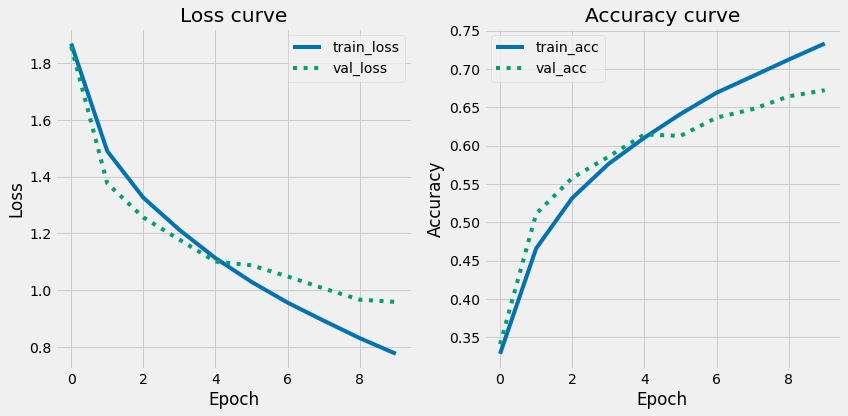

In [47]:
plot_report(history, 10)